<h1>Домашнее задание к вебинару 1 <h1>

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from math import tanh, cos

Запишем функции активации, которые пригодятся для экспериментов

In [38]:
# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [39]:
# вычисление Relu функции

def ReLU(x):
    return x * (x > 0)

In [40]:
def ReLU_deriv(x):
    #return 1 if x > 0 else 0
    return np.where(x>0, 1, 0)

In [41]:
def tahn(x):
    return tanh(x)

In [42]:
def tahn_deriv(x):
    return 1/cos(x) ** 2 

(1797, 64)


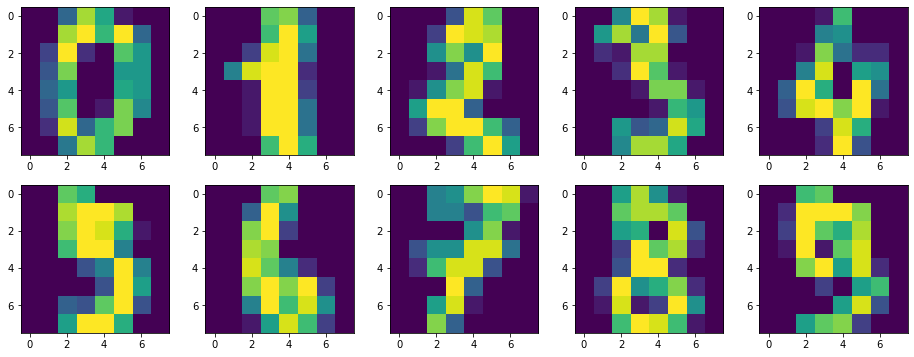

In [43]:
# Загрузка датасета load_digits

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler


# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]))

In [44]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [45]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [46]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [47]:
# Проверка. В y быть 10 столбцов, т к у нас 10 чисел
y.shape

(1797, 10)

In [48]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [49]:
y_train[:10]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

## Построение двухслойной нейронной сети на numpy <a class='anchor' id='example2'>

<h3>Задание 1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.<h3>

Настроила параметры методом подбора

In [96]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
# СКОРРЕКТИРОВАНО (ИСХОДНОЕ ЗНАЧЕНИЕ = 5)
neuron_numb = 16

# присваивание исходных случайных весов
np.random.seed(1)
w0 = np.random.random((64, neuron_numb))  # для входного первого слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
# СКОРРЕКТИРОВАНО (ИСХОДНОЕ ЗНАЧЕНИЕ = 0.01)
learning_rate = 0.04

# количество итераций
# СКОРРЕКТИРОВАНО (ИСХОДНОЕ ЗНАЧЕНИЕ = 100)
num_epochs = 300

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    # получим матрицу значений 1 слоя
    layer1 = sigmoid(np.dot(layer0, w0)) # Пробовала использовать ReLU, tahn
    # получим значения выходного слоя
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    # с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T) # перешли на 1 слой
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

In [97]:
X_train.shape, w0.shape

((1203, 64), (64, 16))

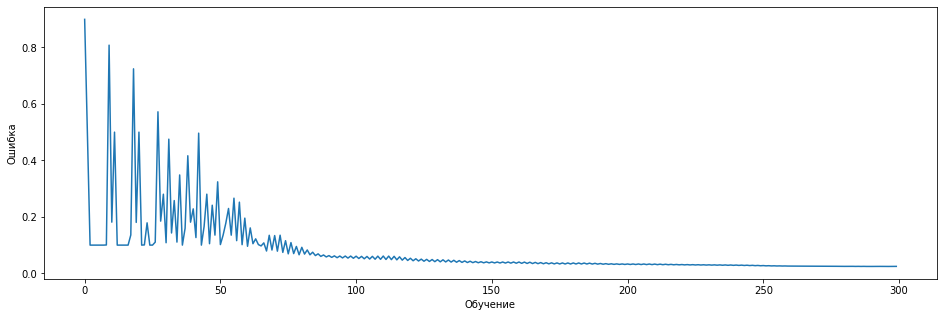

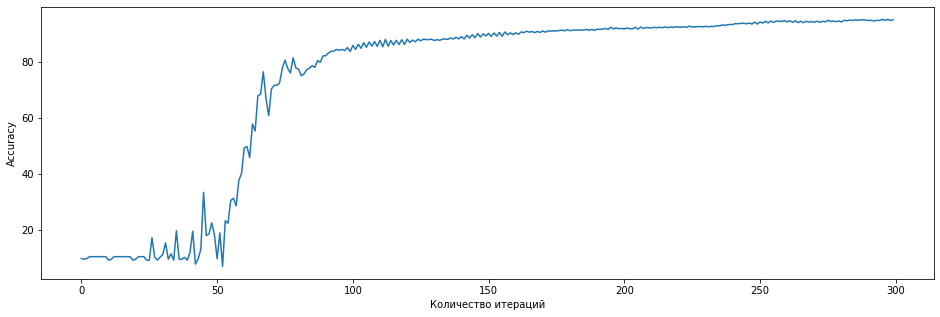

In [98]:
# Визуализация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

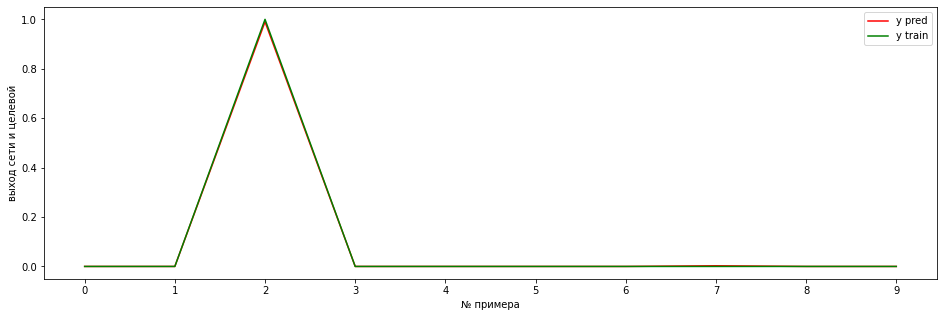

accuracy на обучении 95.01%


In [99]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

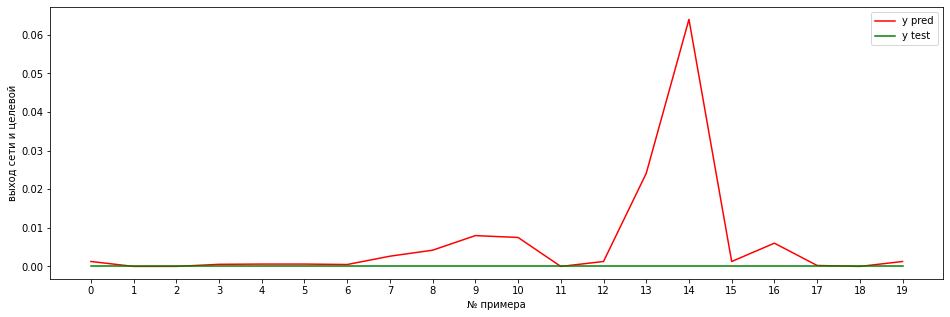

accuracy на тесте 91.25%


In [100]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

<h3>Задание 2. Проведите анализ — что приводит к ухудшению точности нейронной сети?<h3>

**Функция активации**.  
При любой комбинации функций активации 1 и 2 слоя, отличной от sigmoid и sigmoid, результаты ухудшались. 
Были протестированы такие комбинации как:  
ReLU-sigmoid   
ReLU - tahn  
sigmoid-tahn и наоборот 
tahn-tahn  
  
**Количество итераций**  
Найдено оптимальное значения количества итераций - 300, значения ниже уменьшают метрику. 

**Скорость обучения**.   
Увеличение скорости обучения существенно портит метрику 
  
**Количество нейронов в скрытом слое**   
Уменьшение нейронов понижением метрику. 

<h3>Задание 3. Что приводит к увеличению точности?<h3>

**Количество итераций**  
Увеличение итераций повлияло на метрику в сторону роста. Найдено оптимальное значения количества итераций - 300, применяя бОльшее чисто итераций (например, 500), метрика остается примерно такой же (варьируется не существенно), то есть не имеет смысла использовать больше итераций и усложнять модель

**Скорость обучения**.   
Скорость обучения повлияла на рост метрики. Аккуратно подбирая значения методом перебора, я получила лучший результат при learning_rate = 0.04,  понижая или повышая скорость - метрика сразу падала. 
  
**Количество нейронов в скрытом слое**   
Увеличивая количество нейронов, метрика наиболее заметно росла

## Домашнее задание <a class='anchor' id='hw'>

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.
2. Проведите анализ — что приводит к ухудшению точности нейронной сети?
3. Что приводит к увеличению ее точности?

## Дополнительные материалы

1. [Machine Learning News and Articles](https://medium.com/topic/machine-learning)
2. [Neural Net from scratch](https://towardsai.net/p/machine-learning/nothing-but-numpy-understanding-creating-neural-networks-with-computational-graphs-from-scratch-6299901091b0)
3. [Let’s code a Neural Network in plain NumPy](https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795)